# Transfer Learning

*** 

**Goal:** In this notebook we will look at the topic of transfer learning. We will use our model from task 5 which was trained on the mnist data set and use it to classify the emnist data set. We will also look at the topic of fine tuning.

**Dataset**: We will work with the EMNIST dataset [^cite1] which contains handwritten characters from the english alphabet and digits.

**Help:** This notebook is based on the following tensorflow tutorial: https://www.tensorflow.org/tutorials/images/transfer_learning#configure_the_dataset_for_performance

[^cite1]: Cohen, G., Afshar, S., Tapson, J., & van Schaik, A. (2017). EMNIST: an extension of MNIST to handwritten letters. Retrieved from http://arxiv.org/abs/1702.05373
***

## 1. Imports

First we will import the necessary libraries. In case `emnist` is not installed on your system, you can install it by running the following command in your terminal: `pip install emnist`. In case `extra_keras_datasets` is not installed on your system, you can install it by running the following command in your terminal: `pip install extra_keras_datasets`.

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix 
from extra_keras_datasets import emnist

*** 

## 2. Prepare the data

We will prepare the data like defined in the task

In [30]:
(x_train, y_train), (x_test, y_test) = emnist.load_data(type='balanced')

INFO:root:Loading dataset = emnist


In [25]:
print("X-Train Shape: " + str(x_train.shape))
print("Y-Train Shape: " + str(y_train.shape))
print("X-Test Shape:  " + str(x_test.shape))
print("Y-Test Shape:  " + str(y_test.shape))

X-Train Shape: (112800, 28, 28)
Y-Train Shape: (112800,)
X-Test Shape:  (18800, 28, 28)
Y-Test Shape:  (18800,)


Next we will display some images from the dataset to get a feeling for the data.

In [ ]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(y_train[i])

Like defined in the task we will remove all small letters and letters which are not an hexadezimal number. Therefore we will remove all letters where the label is greater than 16.

In [32]:
x_train = x_train[np.where(y_train < 16)]
y_train = y_train[np.where(y_train < 16)]
x_test = x_test[np.where(y_test < 16)]
y_test = y_test[np.where(y_test < 16)]

print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test:  ", x_test.shape)
print("y_Test:  ", y_test.shape)

x_train:  (38400, 28, 28)
y_train:  (38400,)
x_test:   (6400, 28, 28)
y_Test:   (6400,)


Again we will display some images from the dataset to see the changes.

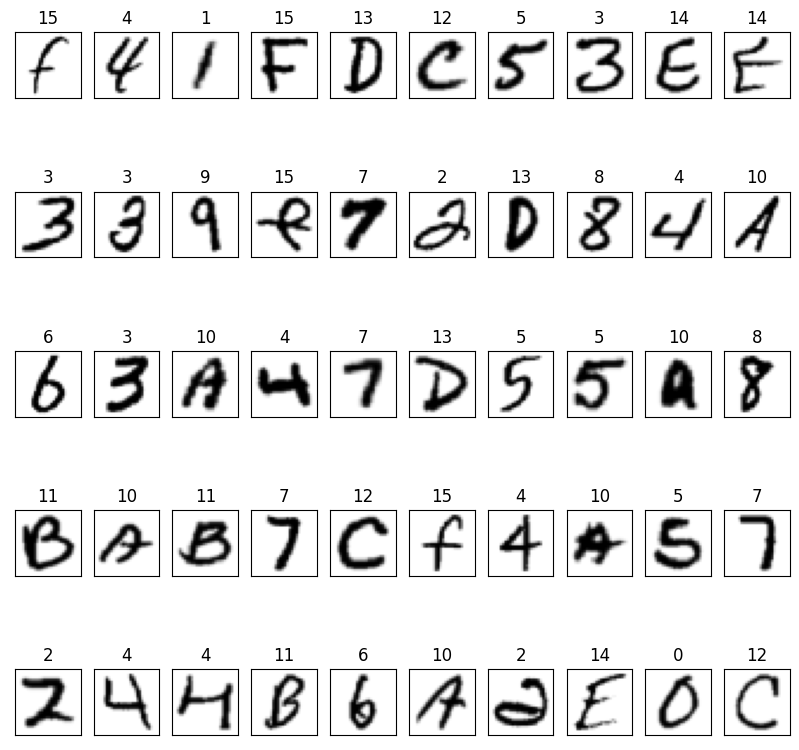

In [27]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(y_train[i])

Like in the CNN task we will normalize the data and reshape it.

In [49]:
# separate x_train in X_train and X_val, same for y_train
X_train=x_train[0:30000] / 255 #divide by 255 so that they are in range 0 to 1
Y_train=keras.utils.to_categorical(y_train[0:30000],16) # one-hot encoding

X_val=x_train[30000:38000] / 255
Y_val=keras.utils.to_categorical(y_train[30000:38000],16)

X_test=x_test / 255
Y_test=keras.utils.to_categorical(y_test,16)

# del x_train, y_train, x_test, y_test

X_train=np.reshape(X_train, (X_train.shape[0],28,28,1))
X_val=np.reshape(X_val, (X_val.shape[0],28,28,1))
X_test=np.reshape(X_test, (X_test.shape[0],28,28,1))

print("X_train: ", X_train.shape)
print("X_val:   ", X_val.shape)
print("X_test:  ", X_test.shape)
print("Y_train: ", Y_train.shape)
print("Y_val:   ", Y_val.shape)
print("Y_test:  ", Y_test.shape)

X_train:  (30000, 28, 28, 1)
X_val:    (8000, 28, 28, 1)
X_test:   (6400, 28, 28, 1)
Y_train:  (30000, 16)
Y_val:    (8000, 16)
Y_test:   (6400, 16)


***

## 3. Load the model and create base model

In [37]:
base_model = tf.keras.models.load_model("../05_Aufgabe/02_CNN/saved_model/my_model")
base_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 10)               

Next we will remove the last layer of our model

In [38]:
base_model.pop()
base_model.pop()
base_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trai

### 3.1 Freeze the base model

Like described in the tensoflow tutorial we will freeze the base model. This means that we will not train the weights of the base model. We will only train the weights of the new added layers. This is done to prevent the weights of the base model from being changed.

In [41]:
base_model.trainable = False

### 3.2 Create the new model

Next we will create the new model. First we will take the old model.

In [40]:
inputs = keras.Input(shape=(28, 28, 1))
x = base_model(inputs, training=False)

Next we will add a Dense-layer and once Softmax, so that the different classes can be predicted.

In [42]:
last_layer = tf.keras.layers.Dense(16, activation='softmax')(x)
output     = tf.keras.layers.Activation('softmax')(last_layer)

Finally we will merge the old model with the new model.

In [43]:
model = keras.Model(inputs, output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 sequential_3 (Sequential)   (None, 1600)              18816     
                                                                 
 dense_1 (Dense)             (None, 16)                25616     
                                                                 
 activation_1 (Activation)   (None, 16)                0         
                                                                 
Total params: 44,432
Trainable params: 25,616
Non-trainable params: 18,816
_________________________________________________________________


## 4. Train the model

Next we will train the model. We will use the same parameters as in the CNN task.

In [50]:
# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [51]:
# Accuracy vor dem Transferlearning bestimmen
loss0, accuracy0 = model.evaluate(x = X_test,y = Y_test)

KeyboardInterrupt: 

In [52]:
# train the model
history=model.fit(X_train, Y_train, 
                  batch_size=128, 
                  epochs=10,
                  verbose=2, 
                  validation_data=(X_val, Y_val)
                 )

Epoch 1/10
235/235 - 4s - loss: 1.8948 - accuracy: 0.9842 - val_loss: 1.8951 - val_accuracy: 0.9840 - 4s/epoch - 17ms/step
Epoch 2/10
235/235 - 3s - loss: 1.8921 - accuracy: 0.9863 - val_loss: 1.8951 - val_accuracy: 0.9839 - 3s/epoch - 12ms/step
Epoch 3/10
235/235 - 3s - loss: 1.8914 - accuracy: 0.9868 - val_loss: 1.8963 - val_accuracy: 0.9833 - 3s/epoch - 12ms/step
Epoch 4/10
235/235 - 3s - loss: 1.8900 - accuracy: 0.9876 - val_loss: 1.8971 - val_accuracy: 0.9814 - 3s/epoch - 14ms/step
Epoch 5/10
235/235 - 3s - loss: 1.8894 - accuracy: 0.9882 - val_loss: 1.8983 - val_accuracy: 0.9810 - 3s/epoch - 13ms/step
Epoch 6/10
235/235 - 4s - loss: 1.8883 - accuracy: 0.9890 - val_loss: 1.8970 - val_accuracy: 0.9811 - 4s/epoch - 17ms/step
Epoch 7/10
235/235 - 3s - loss: 1.8882 - accuracy: 0.9892 - val_loss: 1.8975 - val_accuracy: 0.9805 - 3s/epoch - 11ms/step
Epoch 8/10
235/235 - 4s - loss: 1.8871 - accuracy: 0.9900 - val_loss: 1.8975 - val_accuracy: 0.9797 - 4s/epoch - 19ms/step
Epoch 9/10
235/2

Running the code above will show thw enhancement of transfer learning. The complete training process will only take about ~45 seconds where the CNN task took about 3 minutes. This is a huge improvement and the accuracy is still very good.

**QUESTION** Why are val_accuracy missing?

## 5. Evaluate the model

### Evaluation: Accuracy and Loss Diagram

To evaluate the performance of the network we will plot the accuracy and loss diagram. The accuracy is the percentage of correctly classified images and the loss is the error of the network. The loss should decrease over time and the accuracy should increase.

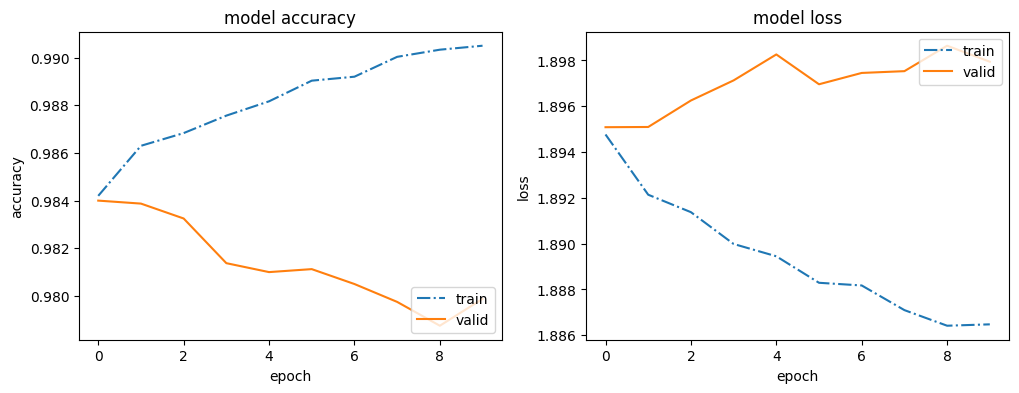

In [53]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')

In [54]:
pred=model.predict(X_test)
print(confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(pred,axis=1)))
acc_fc_orig = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("Acc_fc_orig_flat = " , acc_fc_orig)

200/200 [==============================] - 1s 4ms/step
[[383   0   0   0   0   0   2   0   0   1   0   0   2  12   0   0]
 [  0 397   2   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  1   1 390   1   1   0   0   1   2   0   1   1   0   1   0   0]
 [  1   0   0 390   0   5   0   1   1   1   0   1   0   0   0   0]
 [  1   0   0   0 389   0   0   0   1   5   2   0   0   1   0   1]
 [  1   0   0   2   1 387   0   0   3   2   0   0   1   0   2   1]
 [  1   0   0   0   0   2 395   0   0   0   0   0   1   0   1   0]
 [  1   0   1   2   0   0   0 395   0   0   0   0   0   0   0   1]
 [  0   0   0   0   1   1   0   0 387   2   2   4   0   1   1   1]
 [  2   0   0   0   3   0   0   4   1 390   0   0   0   0   0   0]
 [  1   0   1   0   3   0   1   0   1   1 391   1   0   0   0   0]
 [  2   0   1   0   0   1   2   1   4   0   3 382   0   1   3   0]
 [  4   0   1   0   0   0   3   0   0   0   0   0 389   0   3   0]
 [ 23   0   1   1   0   1   0   1   1   0   1   4   0 365   2   0]
 [  0  